In [59]:
import quantrocket.master
from quantrocket.master import get_securities
import pandas as pd, numpy as np

In [3]:
from quantrocket import get_prices

In [4]:
# china: FIBBG00203J8V6
# canada: FIBBG0029T2KJ5 (or FIBBG000BC18F5)
# japan: FIBBG000BL97R6
# mexico: FIBBG0015XN496 (london-1d)
# hungary: FIBBG000QGWGG7
# sweden: FIBBG000QZXB02 (mexico-1d)
# poland: FIBBG001CGQZG5 (mexico-1d)
# korea: FIBBG000PQY818 (mexico-1d)
# thailand: FIBBG0017DVJR6 (london-1d)
# newzealand: FIBBG001CGQZJ2 (mexico-1d)
# hong kong: FIBBG007V5QTW1 (china-1d)

trading_currency_flow_sid_databases = \
 {"china": ("FIBBG00203J8V6", "china-1d"), "canada": ("FIBBG0029T2KJ5", "canada-1d"), 
 "japan": ("FIBBG000BL97R6", "japan-1d"), "mexico": ("FIBBG0015XN496", "london-1d"), 
 "hungary": ("FIBBG000QGWGG7", "hungary-1d"), "sweden": ("FIBBG000QZXB02", "mexico-1d"), 
 "poland": ("FIBBG001CGQZG5", "mexico-1d"), "korea": ("FIBBG000PQY818", "mexico-1d"), 
 "thailand": ("FIBBG0017DVJR6", "london-1d"), "newzealand": ("FIBBG001CGQZJ2", "mexico-1d"), 
 "hongkong": ("FIBBG007V5QTW1", "china-1d")}

<AxesSubplot:xlabel='Field,Date'>

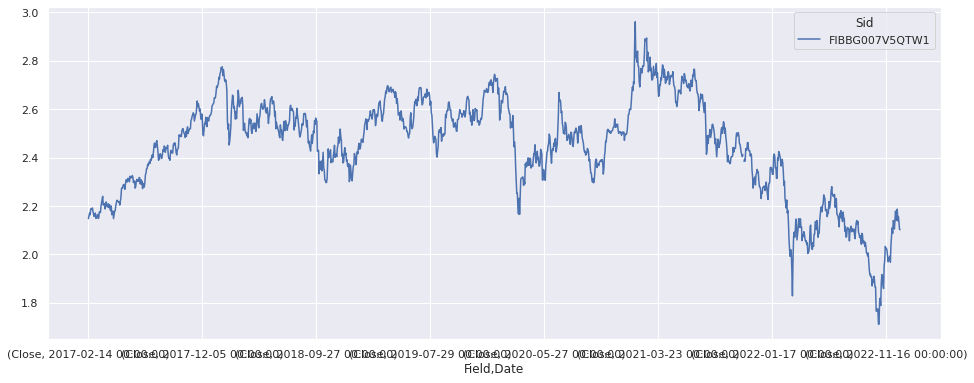

In [5]:
get_prices("china-1d", sids=["FIBBG007V5QTW1"], fields="Close", data_frequency="d").plot()

In [6]:
price_spy = get_prices("usstock-1d", sids=["FIBBG000BDTBL9"], fields="Close", data_frequency="d")

<AxesSubplot:xlabel='Field,Date'>

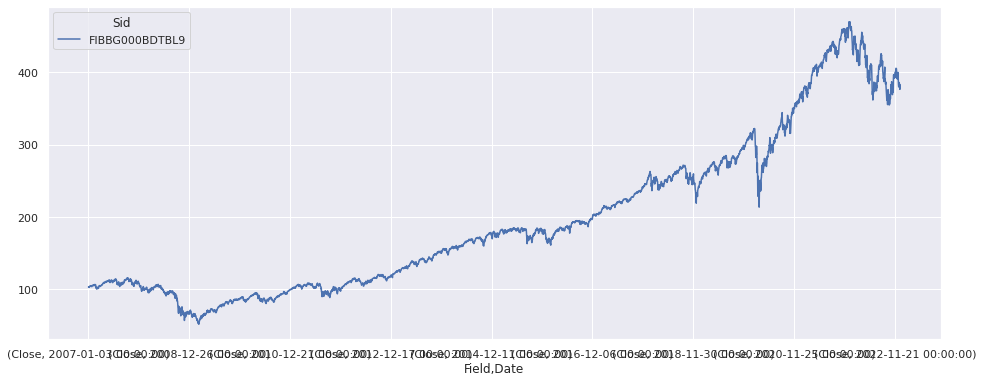

In [7]:
price_spy.plot()

In [8]:
alpha_days = 10
beta_days = 30
gamma_days = 10

In [9]:
price_spy.tail(10)

Sid               FIBBG000BDTBL9
Field Date                      
Close 2022-12-16          383.27
      2022-12-19          380.02
      2022-12-20          380.54
      2022-12-21          386.23
      2022-12-22          380.72
      2022-12-23          382.91
      2022-12-27          381.40
      2022-12-28          376.66
      2022-12-29          383.44
      2022-12-30             NaN

In [10]:
price_spy_past = price_spy.shift(beta_days)
return_spy_current = (price_spy - price_spy_past) / price_spy_past
return_spy = return_spy_current.shift(gamma_days)

<AxesSubplot:xlabel='Field,Date'>

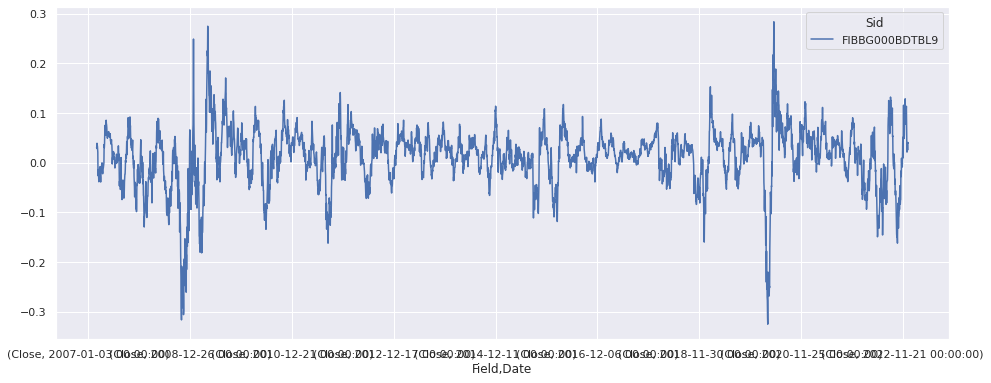

In [11]:
return_spy.plot()

<AxesSubplot:xlabel='Field,Date'>

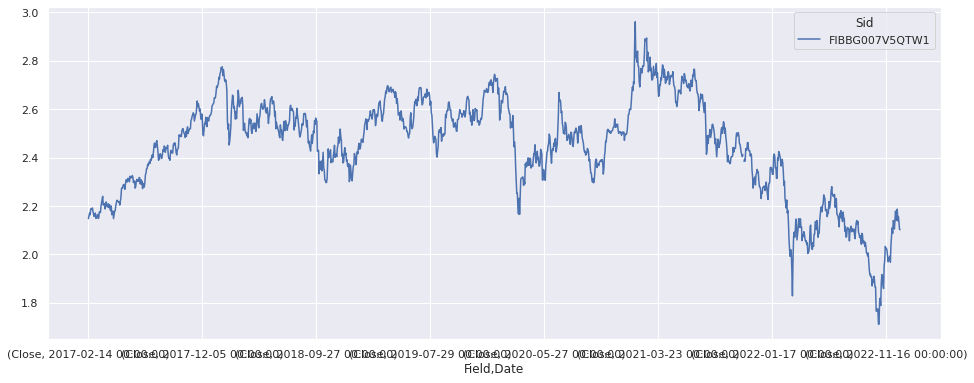

In [12]:
get_prices("china-1d", sids=["FIBBG007V5QTW1"], fields="Close", data_frequency="d").plot()

In [78]:
get_prices("global-1d", sids=["FIBBG007V5QTW1"], fields="Close", data_frequency="d").plot()

NoHistoricalData: ('400 Client Error: BAD REQUEST for url: http://houston/history/global-1d.csv?sids=FIBBG007V5QTW1&fields=Close', {'status': 'error', 'msg': 'no history matches the query parameters'})

In [13]:
sid, database= trading_currency_flow_sid_databases["japan"]
price_ind = get_prices(database, sids=sid, fields="Close", data_frequency="d")
price_ind_past = price_ind.shift(alpha_days)
return_ind = (price_ind - price_ind_past) / price_ind_past

<AxesSubplot:xlabel='Field,Date'>

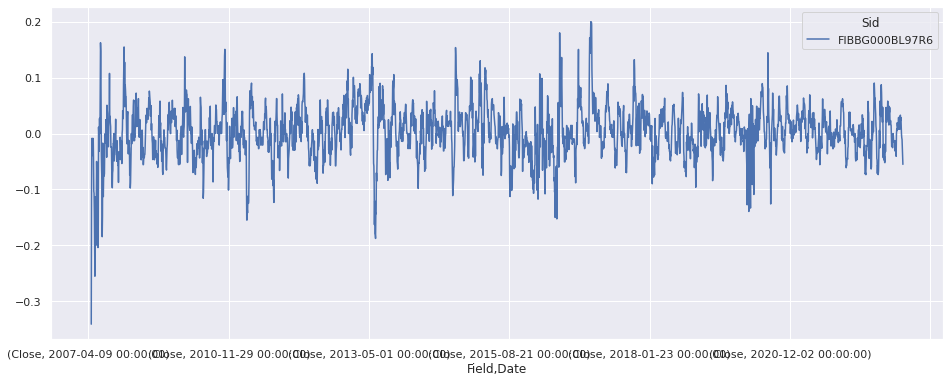

In [14]:
return_ind.plot()

In [15]:
#def get_return_ind(name)

name = "japan"
sid, database= trading_currency_flow_sid_databases[name]

price_ind = get_prices(database, sids=sid, fields="Close", data_frequency="d")
price_ind_past = price_ind.shift(alpha_days)
return_ind = (price_ind - price_ind_past) / price_ind_past

In [17]:
return_ind

Sid               FIBBG000BL97R6
Field Date                      
Close 2007-04-09             NaN
      2008-09-03             NaN
      2008-09-04             NaN
      2008-09-05             NaN
      2008-09-08             NaN
...                          ...
      2022-12-06       -0.007688
      2022-12-14       -0.010505
      2022-12-15       -0.025992
      2022-12-20       -0.036827
      2022-12-21       -0.055182

[2903 rows x 1 columns]

In [43]:
return_inds = {}
for name, v in trading_currency_flow_sid_databases.items():
    sid, database = v
    if sid not in return_ind:
        continue
    return_inds[name] = [return_ind[sid].iloc[-1]]

return_inds

{'japan': [-0.05518207282913162]}

In [44]:
pd.DataFrame.from_dict(return_inds)

,japan
0,-0.055182


In [54]:
df = pd.DataFrame.from_dict({**return_inds, **{"dummy_large": 1, "dummy_small": -1}})

In [55]:
df

,japan,dummy_large,dummy_small
0,-0.055182,1,-1


In [71]:
df.sort_values(by=0, axis=1)

,dummy_small,japan,dummy_large
0,-1,-0.055182,1


In [77]:
df.sort_values(by=0, axis=1).columns.values

array(['dummy_small', 'japan', 'dummy_large'], dtype=object)